In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("laptop_details.csv")

In [3]:
df.sample(5)

,Product,Rating,MRP,Feature
98,APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...,4.7,"₹88,990",Apple M1 Processor8 GB DDR4 RAMMac OS Operatin...
567,ASUS ROG Strix G15 Ryzen 7 Octa Core AMD R7-48...,4.6,"₹85,990",AMD Ryzen 7 Octa Core Processor16 GB DDR4 RAMW...
606,RedmiBook Pro Core i5 11th Gen - (8 GB/512 GB ...,4.1,"₹39,990",Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...
174,ASUS Vivobook 14 (2022) Core i5 12th Gen - (8 ...,4.4,"₹56,990",Intel Core i5 Processor (12th Gen)8 GB DDR4 RA...
378,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,NaN,"₹37,000",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...


In [4]:
df.shape

(720, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [6]:
data = df.copy()

In [7]:
df.duplicated().sum()

297

In [8]:
# We dont need duplicate values so we are dropping them
df = df.drop_duplicates().reset_index(drop=True)

In [9]:
df.shape

(423, 4)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  423 non-null    object 
 1   Rating   339 non-null    float64
 2   MRP      423 non-null    object 
 3   Feature  423 non-null    object 
dtypes: float64(1), object(3)
memory usage: 13.3+ KB


In [11]:
# Handelling the missing values

<AxesSubplot:xlabel='Rating'>

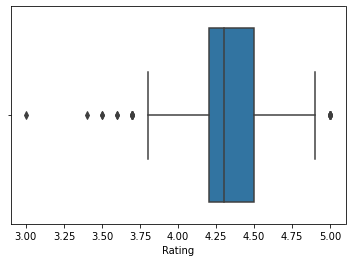

In [12]:
sns.boxplot(df["Rating"])

In [13]:
df["Rating"].describe()

count    339.000000
mean       4.316224
std        0.299905
min        3.000000
25%        4.200000
50%        4.300000
75%        4.500000
max        5.000000
Name: Rating, dtype: float64

<AxesSubplot:ylabel='Density'>

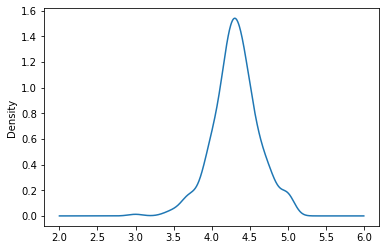

In [14]:
df["Rating"].plot(kind="kde")

In [15]:
# 19% of data is missing in rating colum
df.isnull().mean()

Product    0.000000
Rating     0.198582
MRP        0.000000
Feature    0.000000
dtype: float64

**Observation**
* Our mean and meadian are very close even though we have outliers

In [16]:
df["Rating"].var()

0.08994309751968008

In [17]:
df["Rating"].fillna(df["Rating"].median()).var()

0.07208172274321337

<AxesSubplot:ylabel='Density'>

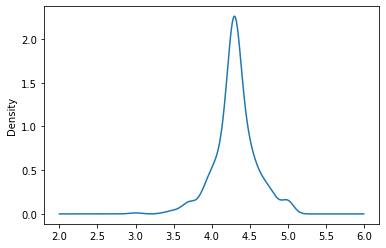

In [18]:
df["Rating"].fillna(df["Rating"].median()).plot(kind="kde")

### Observation
* After imputing the distribution of the rating is getting streched little so we are going to use random sample imputation

In [19]:
def Random_Sample_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isnull().sum())               
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature] = random_sample

In [20]:
Random_Sample_imputation("Rating")

In [21]:
df["Rating"].var()

0.08750831904809922

<AxesSubplot:ylabel='Density'>

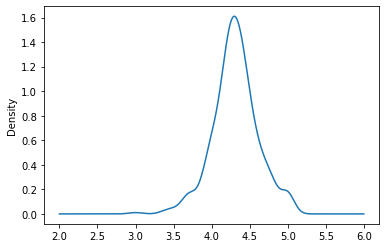

In [22]:
df["Rating"].plot(kind="kde")

In [23]:
df.isnull().mean()

Product    0.0
Rating     0.0
MRP        0.0
Feature    0.0
dtype: float64

In [24]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [25]:
df["Product"][0]

'Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop'

In [26]:
df["Feature"][0]

'Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty'

In [27]:
df1 = pd.DataFrame()

In [28]:
df1["company_name"] = df["Product"].apply(lambda x : x.split(" ")[0])

In [29]:
df1["model_name"] = df["Product"].apply(lambda x : x.split(" ")[:6])

In [30]:
df1["model_name"] = df1["model_name"].apply(lambda x : " ".join(x))

In [31]:
df1["processor_name"] = df["Feature"].apply(lambda x : x.split("Processor")[0])

In [32]:
df1["ram"] = df["Feature"].apply(lambda x : x.split("Processor")[1].split("RAM")[0].split(")")[-1])

In [33]:
df1["processor_generation"] = df["Feature"].apply(lambda x : x.split("Processor")[1].split("RAM")[0].split(")")[0].split("(")[-1])

In [34]:
df1

,company_name,model_name,processor_name,ram,processor_generation
0,Lenovo,Lenovo IdeaPad 3 Core i3 11th,Intel Core i3,8 GB DDR4,11th Gen
1,Lenovo,Lenovo IdeaPad 3 Core i3 11th,Intel Core i3,8 GB DDR4,11th Gen
2,ASUS,ASUS VivoBook 15 (2022) Core i3,Intel Core i3,8 GB DDR4,10th Gen
3,HP,HP Pavilion Ryzen 5 Hexa Core,AMD Ryzen 5 Hexa Core,8 GB DDR4,8 GB DDR4
4,ASUS,ASUS TUF Gaming F15 Core i5,Intel Core i5,8 GB DDR4,10th Gen
...,...,...,...,...,...
418,DELL,DELL Core i5 12th Gen -,Intel Core i5,16 GB DDR5,12th Gen
419,HP,HP Pavilion Ryzen 7 Octa Core,AMD Ryzen 7 Octa Core,16 GB DDR4,16 GB DDR4
420,ASUS,ASUS Chromebook Flip Touch Celeron Dual,Intel Celeron Dual Core,4 GB LPDDR4,4 GB LPDDR4
421,ASUS,ASUS Zenbook Flip 14 OLED (2022),Intel Core i7,16 GB LPDDR5,12th Gen


In [35]:
df1["operating_system"] = df["Feature"].apply(lambda x : x.split("Processor")[1].split("RAM")[-1].split("Operating System")[0])

In [36]:
df1["storage"] = df["Feature"].apply(lambda x : x.split("Processor")[1].split("RAM")[-1].split("Operating System")[-1].split("Display")[0].split("cm")[0])

In [37]:
df1

,company_name,model_name,processor_name,ram,processor_generation,operating_system,storage
0,Lenovo,Lenovo IdeaPad 3 Core i3 11th,Intel Core i3,8 GB DDR4,11th Gen,64 bit Windows 11,256 GB SSD35.56
1,Lenovo,Lenovo IdeaPad 3 Core i3 11th,Intel Core i3,8 GB DDR4,11th Gen,64 bit Windows 11,512 GB SSD39.62
2,ASUS,ASUS VivoBook 15 (2022) Core i3,Intel Core i3,8 GB DDR4,10th Gen,64 bit Windows 11,512 GB SSD39.62
3,HP,HP Pavilion Ryzen 5 Hexa Core,AMD Ryzen 5 Hexa Core,8 GB DDR4,8 GB DDR4,64 bit Windows 10,512 GB SSD39.62
4,ASUS,ASUS TUF Gaming F15 Core i5,Intel Core i5,8 GB DDR4,10th Gen,Windows 11,512 GB SSD39.62
...,...,...,...,...,...,...,...
418,DELL,DELL Core i5 12th Gen -,Intel Core i5,16 GB DDR5,12th Gen,64 bit Windows 11,512 GB SSD33.78
419,HP,HP Pavilion Ryzen 7 Octa Core,AMD Ryzen 7 Octa Core,16 GB DDR4,16 GB DDR4,64 bit Windows 10,512 GB SSD39.62
420,ASUS,ASUS Chromebook Flip Touch Celeron Dual,Intel Celeron Dual Core,4 GB LPDDR4,4 GB LPDDR4,Chrome,29.46
421,ASUS,ASUS Zenbook Flip 14 OLED (2022),Intel Core i7,16 GB LPDDR5,12th Gen,64 bit Windows 11,512 GB SSD35.56


In [42]:
df1["screen_size"] = df["Feature"].apply(lambda x : x.split("Processor")[1].split("RAM")[-1].split("Operating System")[-1].split("Display")[0].split("cm")[-1])

In [43]:
df1["rating"] = df["Rating"]
df1["price"] = df["MRP"]

In [44]:
df1

,company_name,model_name,processor_name,ram,processor_generation,operating_system,storage,screen_size,rating,price
0,Lenovo,Lenovo IdeaPad 3 Core i3 11th,Intel Core i3,8 GB DDR4,11th Gen,64 bit Windows 11,256 GB SSD35.56,(14 inch),4.2,"₹36,990"
1,Lenovo,Lenovo IdeaPad 3 Core i3 11th,Intel Core i3,8 GB DDR4,11th Gen,64 bit Windows 11,512 GB SSD39.62,(15.6 inch),4.2,"₹39,990"
2,ASUS,ASUS VivoBook 15 (2022) Core i3,Intel Core i3,8 GB DDR4,10th Gen,64 bit Windows 11,512 GB SSD39.62,(15.6 inch),4.3,"₹32,990"
3,HP,HP Pavilion Ryzen 5 Hexa Core,AMD Ryzen 5 Hexa Core,8 GB DDR4,8 GB DDR4,64 bit Windows 10,512 GB SSD39.62,(15.6 inch),4.4,"₹49,990"
4,ASUS,ASUS TUF Gaming F15 Core i5,Intel Core i5,8 GB DDR4,10th Gen,Windows 11,512 GB SSD39.62,(15.6 inch),4.4,"₹49,990"
...,...,...,...,...,...,...,...,...,...,...
418,DELL,DELL Core i5 12th Gen -,Intel Core i5,16 GB DDR5,12th Gen,64 bit Windows 11,512 GB SSD33.78,(13.3 Inch),4.0,"₹76,590"
419,HP,HP Pavilion Ryzen 7 Octa Core,AMD Ryzen 7 Octa Core,16 GB DDR4,16 GB DDR4,64 bit Windows 10,512 GB SSD39.62,(15.6 inches),4.6,"₹90,000"
420,ASUS,ASUS Chromebook Flip Touch Celeron Dual,Intel Celeron Dual Core,4 GB LPDDR4,4 GB LPDDR4,Chrome,29.46,(11.6 inch) Touchscreen,4.0,"₹23,490"
421,ASUS,ASUS Zenbook Flip 14 OLED (2022),Intel Core i7,16 GB LPDDR5,12th Gen,64 bit Windows 11,512 GB SSD35.56,(14 inch) Touchscreen,3.0,"₹1,25,990"


In [46]:
df1["processor_generation"].value_counts()

11th Gen                                                                                                               118
8 GB DDR4                                                                                                               75
12th Gen                                                                                                                66
10th Gen                                                                                                                53
16 GB DDR4                                                                                                              30
16 GB DDR5                                                                                                              15
4 GB DDR4                                                                                                                8
4 GB LPDDR4                                                                                                              7
16 GB Unified Me

In [47]:
def processor_filter(s):
        if "Gen" in s:
            return s
        else:
            return np.NAN            

In [50]:
processor_filter("3rd Gen")

'3rd Gen'

In [52]:
df1["processor_generation"] = df1["processor_generation"].apply(processor_filter)

In [55]:
df1

,company_name,model_name,processor_name,ram,processor_generation,operating_system,storage,screen_size,rating,price
0,Lenovo,Lenovo IdeaPad 3 Core i3 11th,Intel Core i3,8 GB DDR4,11th Gen,64 bit Windows 11,256 GB SSD35.56,(14 inch),4.2,"₹36,990"
1,Lenovo,Lenovo IdeaPad 3 Core i3 11th,Intel Core i3,8 GB DDR4,11th Gen,64 bit Windows 11,512 GB SSD39.62,(15.6 inch),4.2,"₹39,990"
2,ASUS,ASUS VivoBook 15 (2022) Core i3,Intel Core i3,8 GB DDR4,10th Gen,64 bit Windows 11,512 GB SSD39.62,(15.6 inch),4.3,"₹32,990"
3,HP,HP Pavilion Ryzen 5 Hexa Core,AMD Ryzen 5 Hexa Core,8 GB DDR4,NaN,64 bit Windows 10,512 GB SSD39.62,(15.6 inch),4.4,"₹49,990"
4,ASUS,ASUS TUF Gaming F15 Core i5,Intel Core i5,8 GB DDR4,10th Gen,Windows 11,512 GB SSD39.62,(15.6 inch),4.4,"₹49,990"
...,...,...,...,...,...,...,...,...,...,...
418,DELL,DELL Core i5 12th Gen -,Intel Core i5,16 GB DDR5,12th Gen,64 bit Windows 11,512 GB SSD33.78,(13.3 Inch),4.0,"₹76,590"
419,HP,HP Pavilion Ryzen 7 Octa Core,AMD Ryzen 7 Octa Core,16 GB DDR4,NaN,64 bit Windows 10,512 GB SSD39.62,(15.6 inches),4.6,"₹90,000"
420,ASUS,ASUS Chromebook Flip Touch Celeron Dual,Intel Celeron Dual Core,4 GB LPDDR4,NaN,Chrome,29.46,(11.6 inch) Touchscreen,4.0,"₹23,490"
421,ASUS,ASUS Zenbook Flip 14 OLED (2022),Intel Core i7,16 GB LPDDR5,12th Gen,64 bit Windows 11,512 GB SSD35.56,(14 inch) Touchscreen,3.0,"₹1,25,990"


In [64]:
df1["screen_size(inch)"] = df1["screen_size"].apply(lambda x : x.split("inch")[0].replace("(","").replace(")","").replace("Inch",""))

In [68]:
df1.shape

(423, 11)

In [69]:
df1 = df1.drop(["screen_size"], axis=1)

In [70]:
df1.shape

(423, 10)

In [78]:
df1["processor_generation"].isna().mean()

0.40189125295508277

In [77]:
df1["processor_generation"] = df1["processor_generation"].str.replace(": 11th Generation Intel Core i5-1135G7", "11th Gen").replace(": 10th Generation Intel Core i3-1005G1","10th Gen")

In [80]:
df1.to_csv("cleaned_data", index=False)